#Behaviour Profiling

#### Author: Gulshan Kumar




In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_dir='gdrive/MyDrive/Dataset/training_files/'

In [ ]:
user_names=glob.glob(os.path.join(data_dir,'*'))

In [ ]:
user_names

['gdrive/MyDrive/Dataset/training_files/user16',
 'gdrive/MyDrive/Dataset/training_files/user7',
 'gdrive/MyDrive/Dataset/training_files/user23',
 'gdrive/MyDrive/Dataset/training_files/user29',
 'gdrive/MyDrive/Dataset/training_files/user9',
 'gdrive/MyDrive/Dataset/training_files/user15',
 'gdrive/MyDrive/Dataset/training_files/user35',
 'gdrive/MyDrive/Dataset/training_files/user12',
 'gdrive/MyDrive/Dataset/training_files/user21',
 'gdrive/MyDrive/Dataset/training_files/user20']

In [ ]:
files_dict={}
for u in user_names:
    files_dict[os.path.basename(u)]=glob.glob(os.path.join(u,'*'))

### Initiliase the Dataframe

In [ ]:
len(files_dict.values())

10

In [ ]:
final_df=pd.DataFrame()
for u in user_names:
    files=files_dict[os.path.basename(u)]
    for f in files:
        csv=pd.read_csv(f)
        csv['user']=os.path.basename(u)
        csv['session']=os.path.basename(f)
        final_df=pd.concat([final_df,csv],ignore_index=True)

In [ ]:
final_df.head()

,record timestamp,client timestamp,button,state,x,y,user,session
0,0.000,0.000,NoButton,Move,211,517,user16,session_6961018175
1,0.000,0.109,NoButton,Move,518,478,user16,session_6961018175
2,0.225,0.359,NoButton,Move,543,469,user16,session_6961018175
3,0.328,0.468,NoButton,Move,583,454,user16,session_6961018175
4,0.442,0.577,NoButton,Move,595,436,user16,session_6961018175


In [ ]:
final_df.shape

(2253816, 8)

In [ ]:
final_df.fillna(final_df.mean())

<ipython-input-16-14ee1ea31a99>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.fillna(final_df.mean())


,record timestamp,client timestamp,button,state,x,y,user,session
0,0.000,0.000,NoButton,Move,211,517,user16,session_6961018175
1,0.000,0.109,NoButton,Move,518,478,user16,session_6961018175
2,0.225,0.359,NoButton,Move,543,469,user16,session_6961018175
3,0.328,0.468,NoButton,Move,583,454,user16,session_6961018175
4,0.442,0.577,NoButton,Move,595,436,user16,session_6961018175
...,...,...,...,...,...,...,...,...
2253811,13294.976,13295.061,NoButton,Move,272,624,user20,session_9673196280
2253812,13295.259,13295.154,NoButton,Move,267,622,user20,session_9673196280
2253813,13295.259,13295.342,NoButton,Move,265,622,user20,session_9673196280
2253814,13295.411,13295.498,NoButton,Move,264,622,user20,session_9673196280


<Axes: title={'center': 'Number of events per user'}, xlabel='user'>

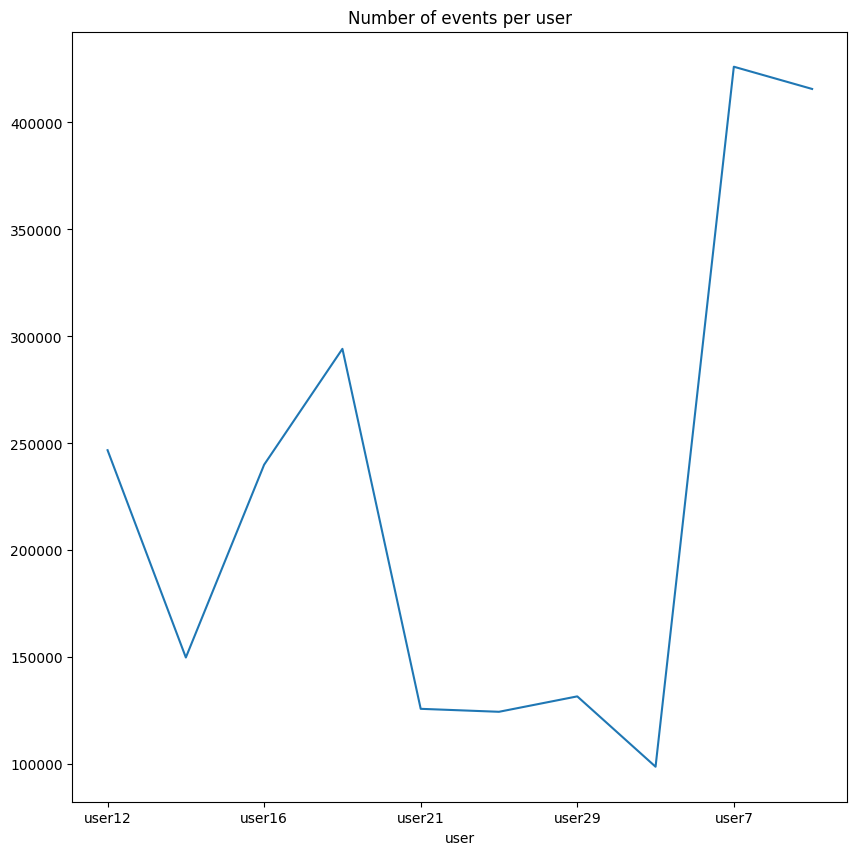

In [ ]:
final_df.groupby(by='user').count()['state'].plot(title='Number of events per user',figsize=(10,10))

<Axes: title={'center': 'Number of events per session'}, xlabel='session'>

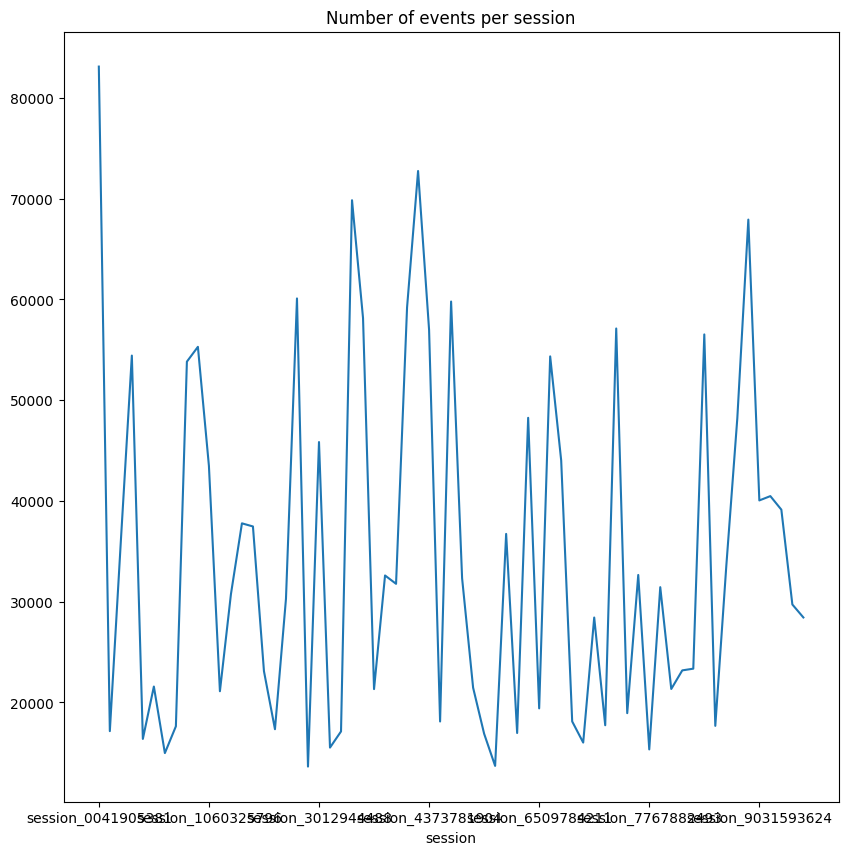

In [ ]:
final_df.groupby(by='session').count()['state'].plot(title='Number of events per session',figsize=(10,10))

### Plots

#### Scatterplot

In [ ]:
sample_df=final_df.groupby('user')
sample_df=sample_df.apply(lambda x: x.sample(100))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'X-Y Position user wise')

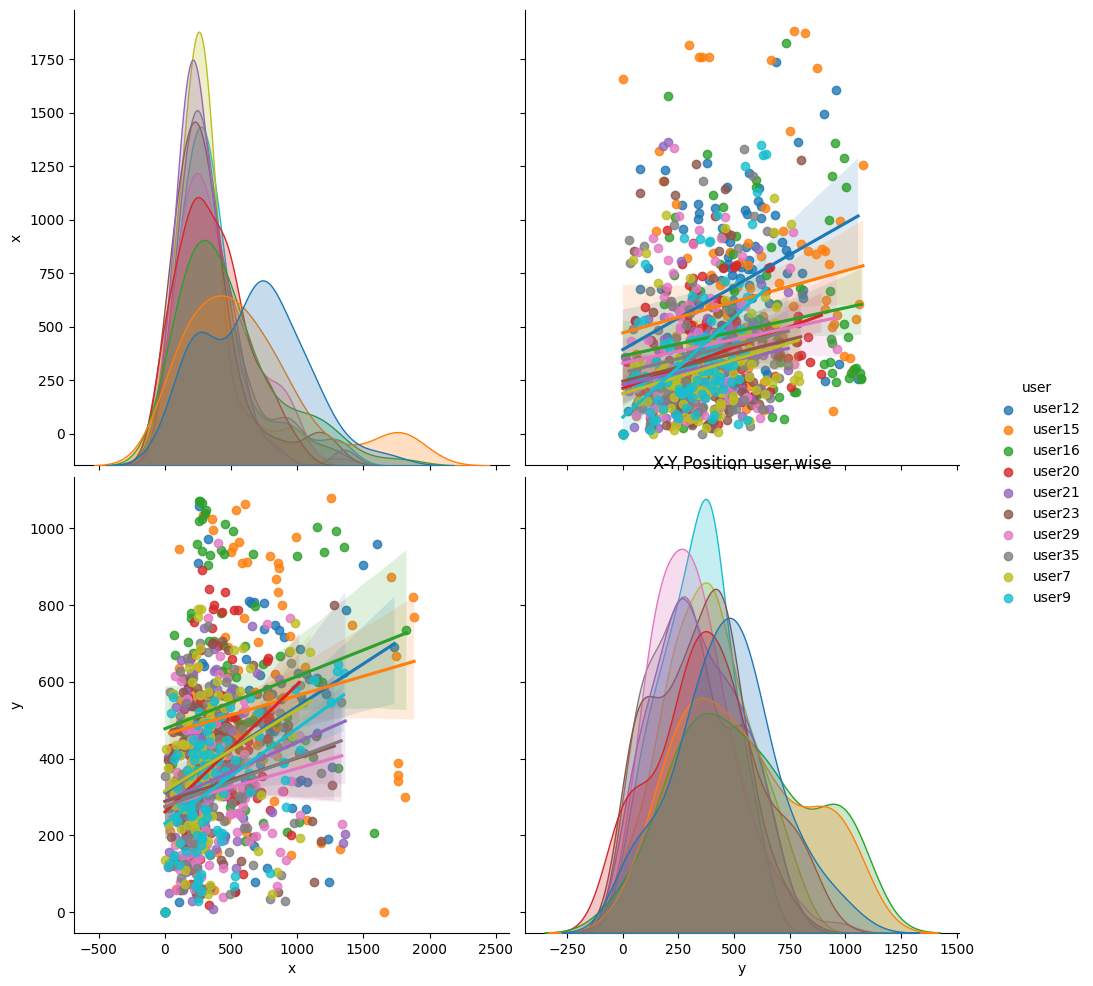

In [ ]:

sns.pairplot(sample_df,hue='user',size=5,vars=['x','y'],kind='reg')
plt.title('X-Y Position user wise')

#### X and Y Heatmap

<ipython-input-23-12f2488a356d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['x'])


<Axes: title={'center': 'Distribution of X'}, xlabel='x', ylabel='Density'>

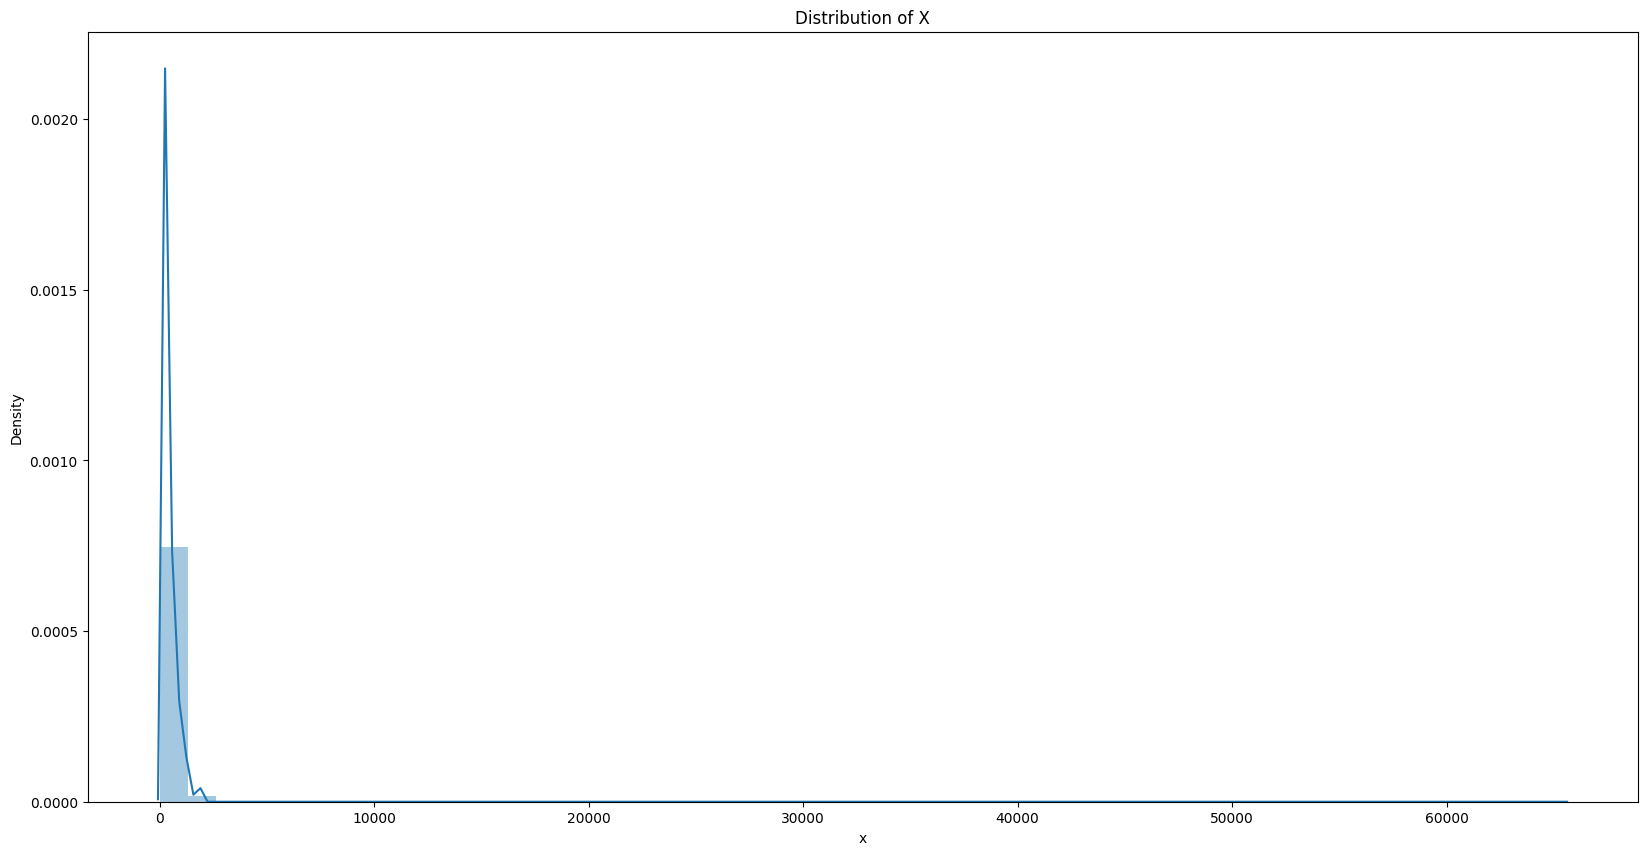

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Distribution of X')
sns.distplot(final_df['x'])


In [ ]:
final_df['y']

0          517
1          478
2          469
3          454
4          436
          ... 
2253811    624
2253812    622
2253813    622
2253814    622
2253815    623
Name: y, Length: 2253816, dtype: int64

<ipython-input-26-266154b5150f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['y'])


<Axes: title={'center': 'Distribution of Y'}, xlabel='y', ylabel='Density'>

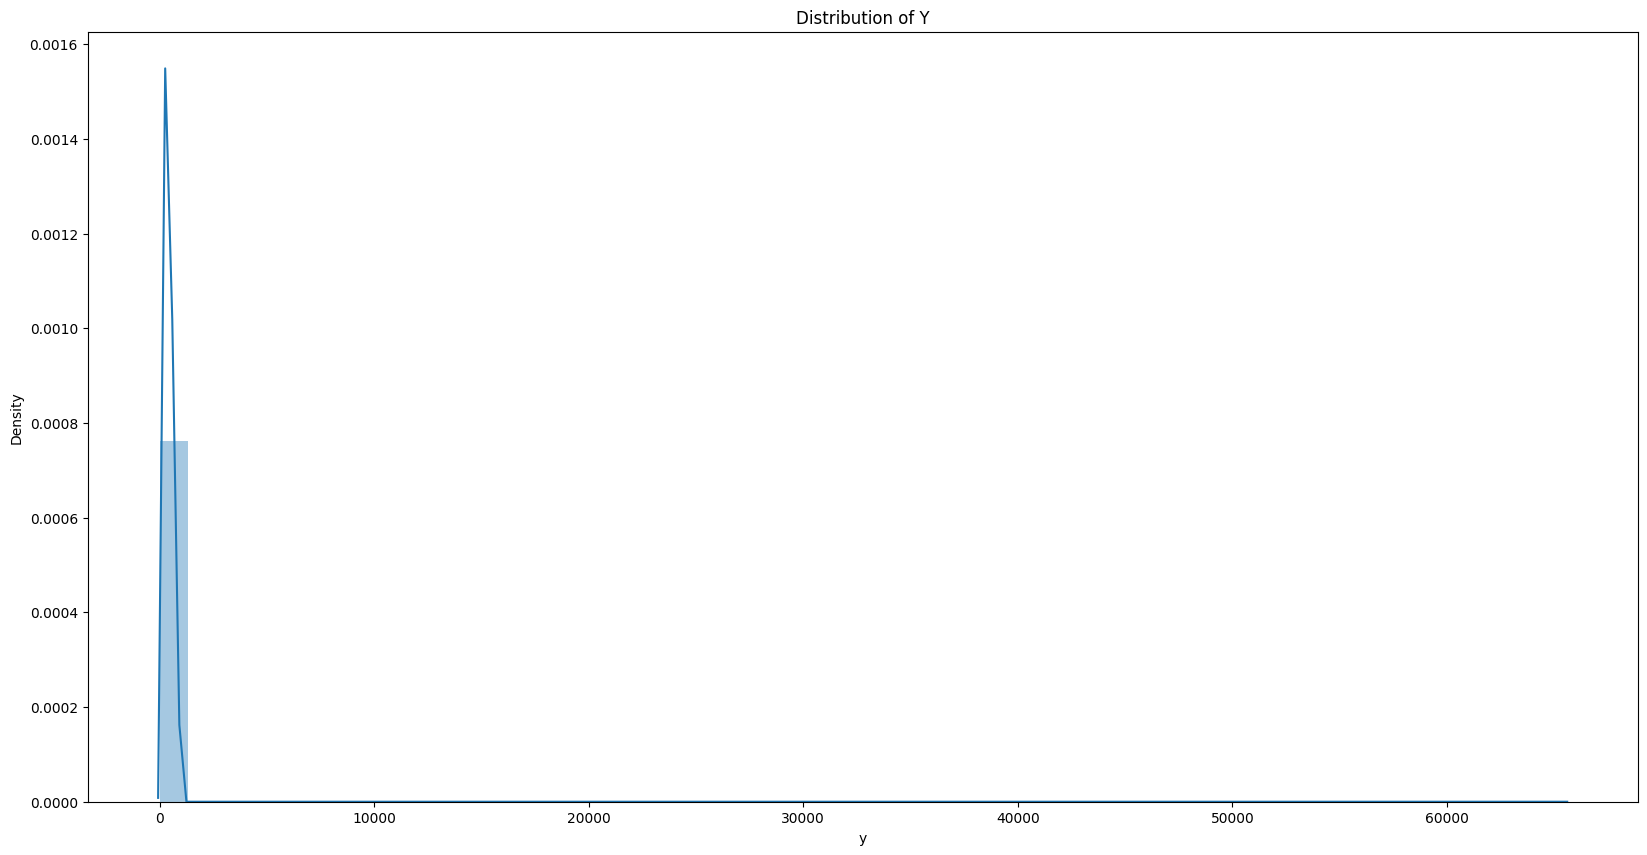

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Y")
sns.distplot(final_df['y'])


<ipython-input-29-ef8a0d2b1bfd>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=sample_df['x'],y=sample_df['y'], shade=True)


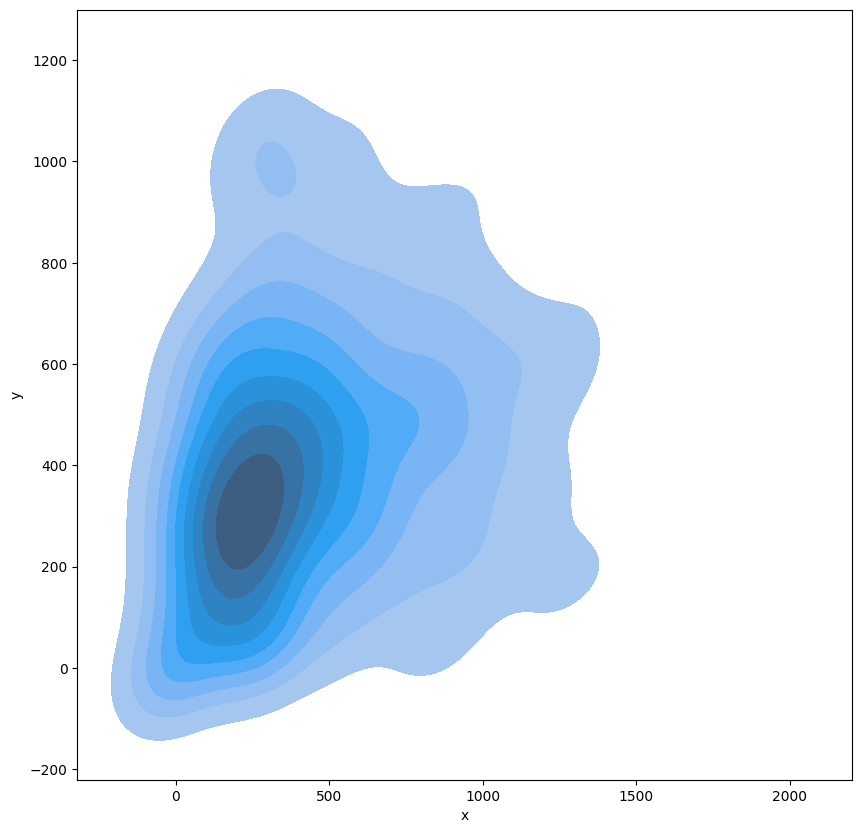

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(x=sample_df['x'],y=sample_df['y'], shade=True)

## HEatMap For Individual users


<ipython-input-31-f1aaf1598fba>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=udf['x'],y=udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
<ipython-input-31-f1aaf1598fba>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=udf['x'],y=udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
<ipython-input-31-f1aaf1598fba>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=udf['x'],y=udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
<ipython-input-31-f1aaf1598fba>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(

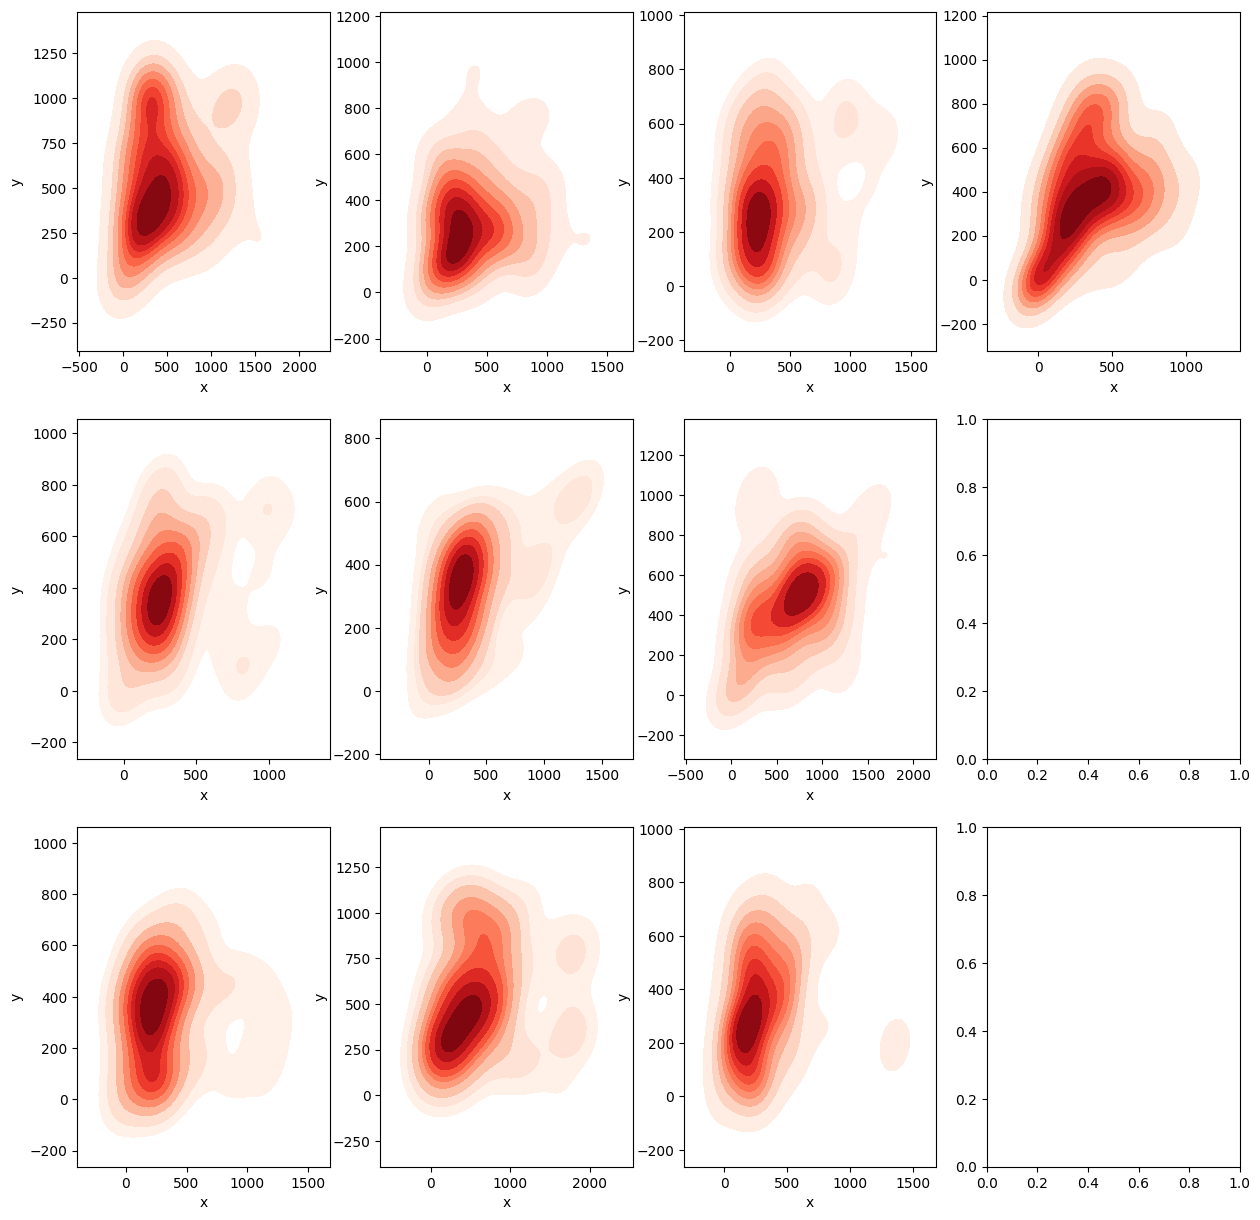

In [ ]:
i=0
j=0
fig,axes=plt.subplots(int(len(user_names)/3),4,figsize=(15,15))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==3):
        j=j+1
        i=0
    sns.kdeplot(x=udf['x'],y=udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
    i=i+1

Clearlt the data shows distinctive x-y movements for every user

### State wise distribution with respect to user

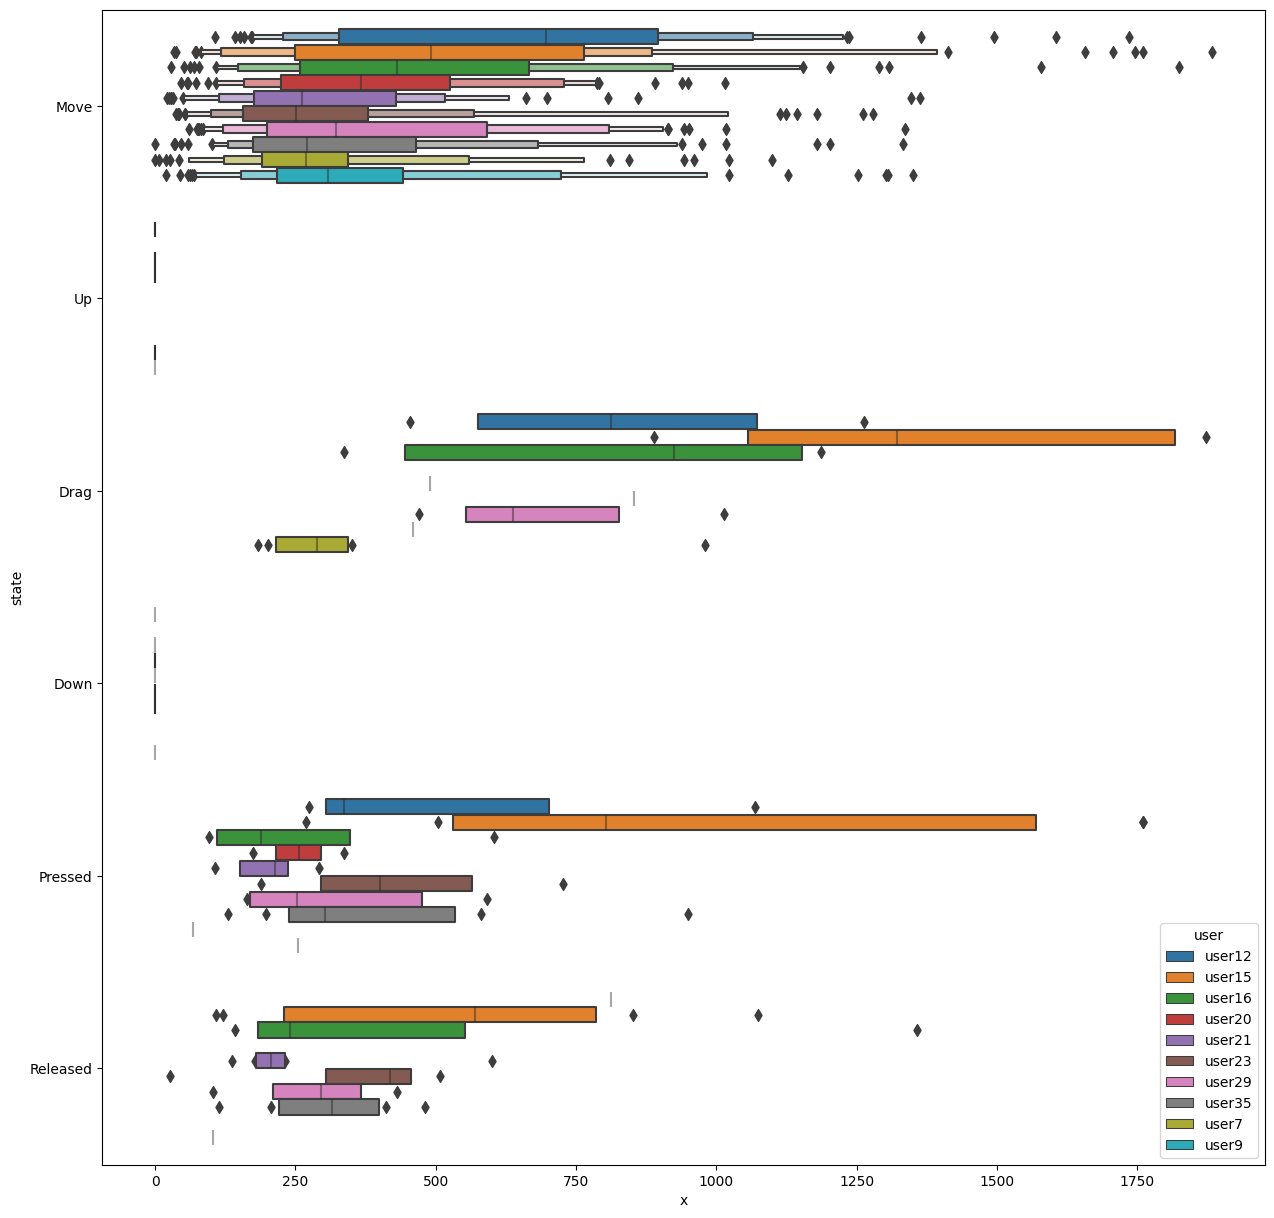

In [ ]:
plt.figure(figsize=(15,15))
ax = sns. boxenplot(x="x", y="state", data=sample_df,hue='user')

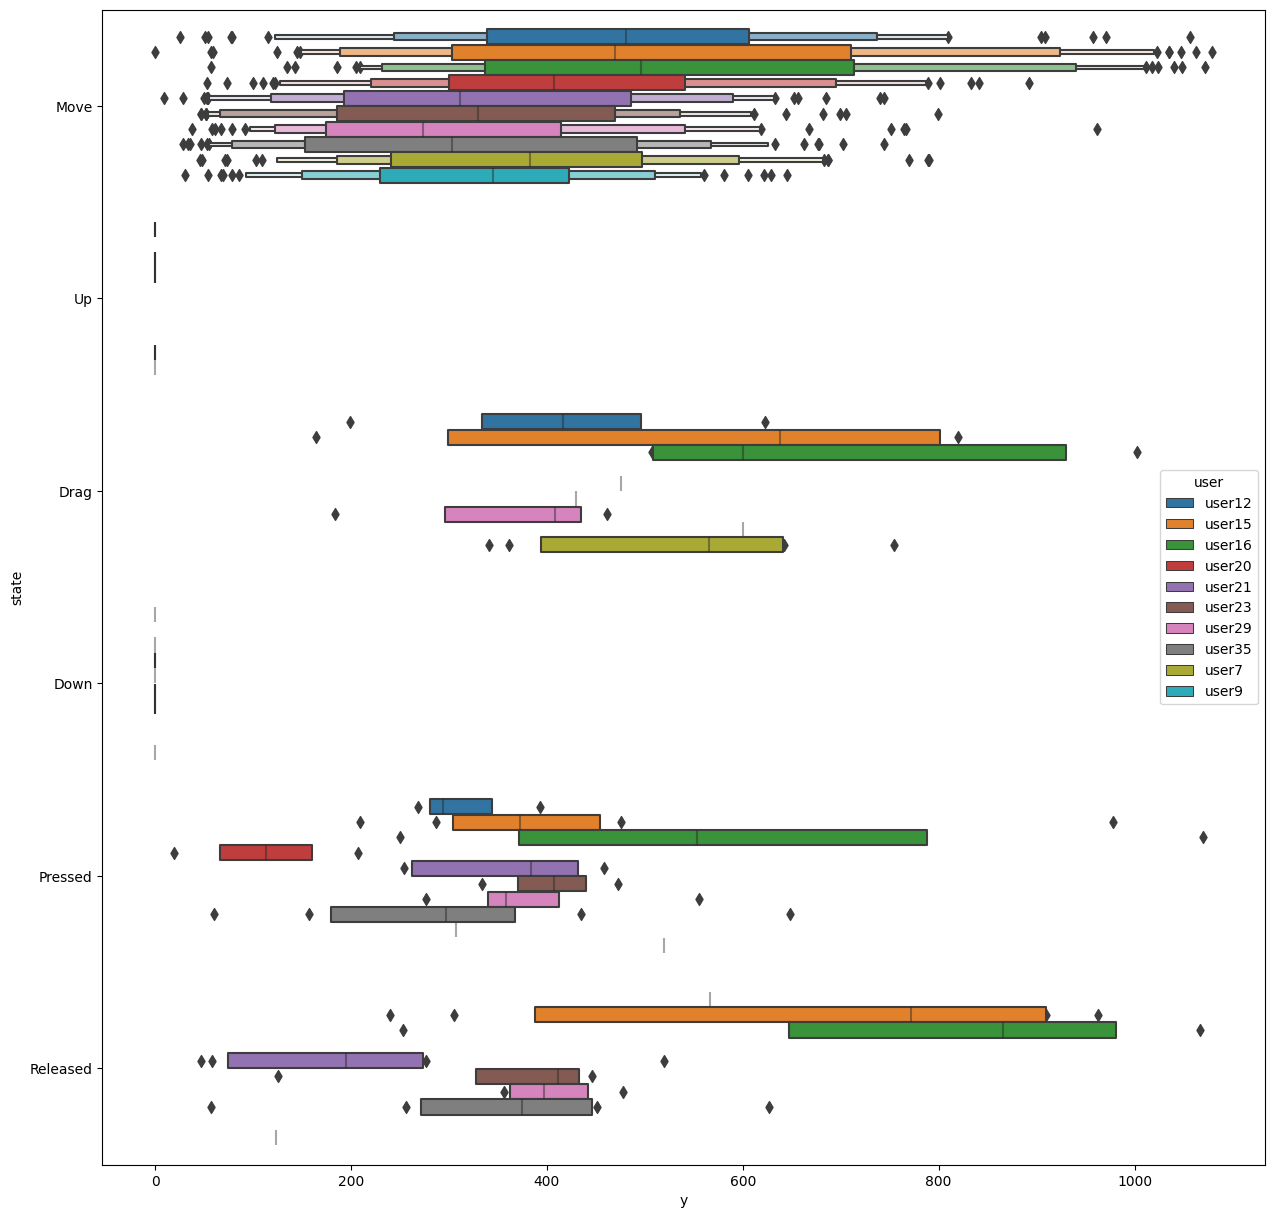

In [ ]:
plt.figure(figsize=(15,15))
ax = sns. boxenplot(x="y", y="state", data=sample_df,hue='user')

### Regression Line

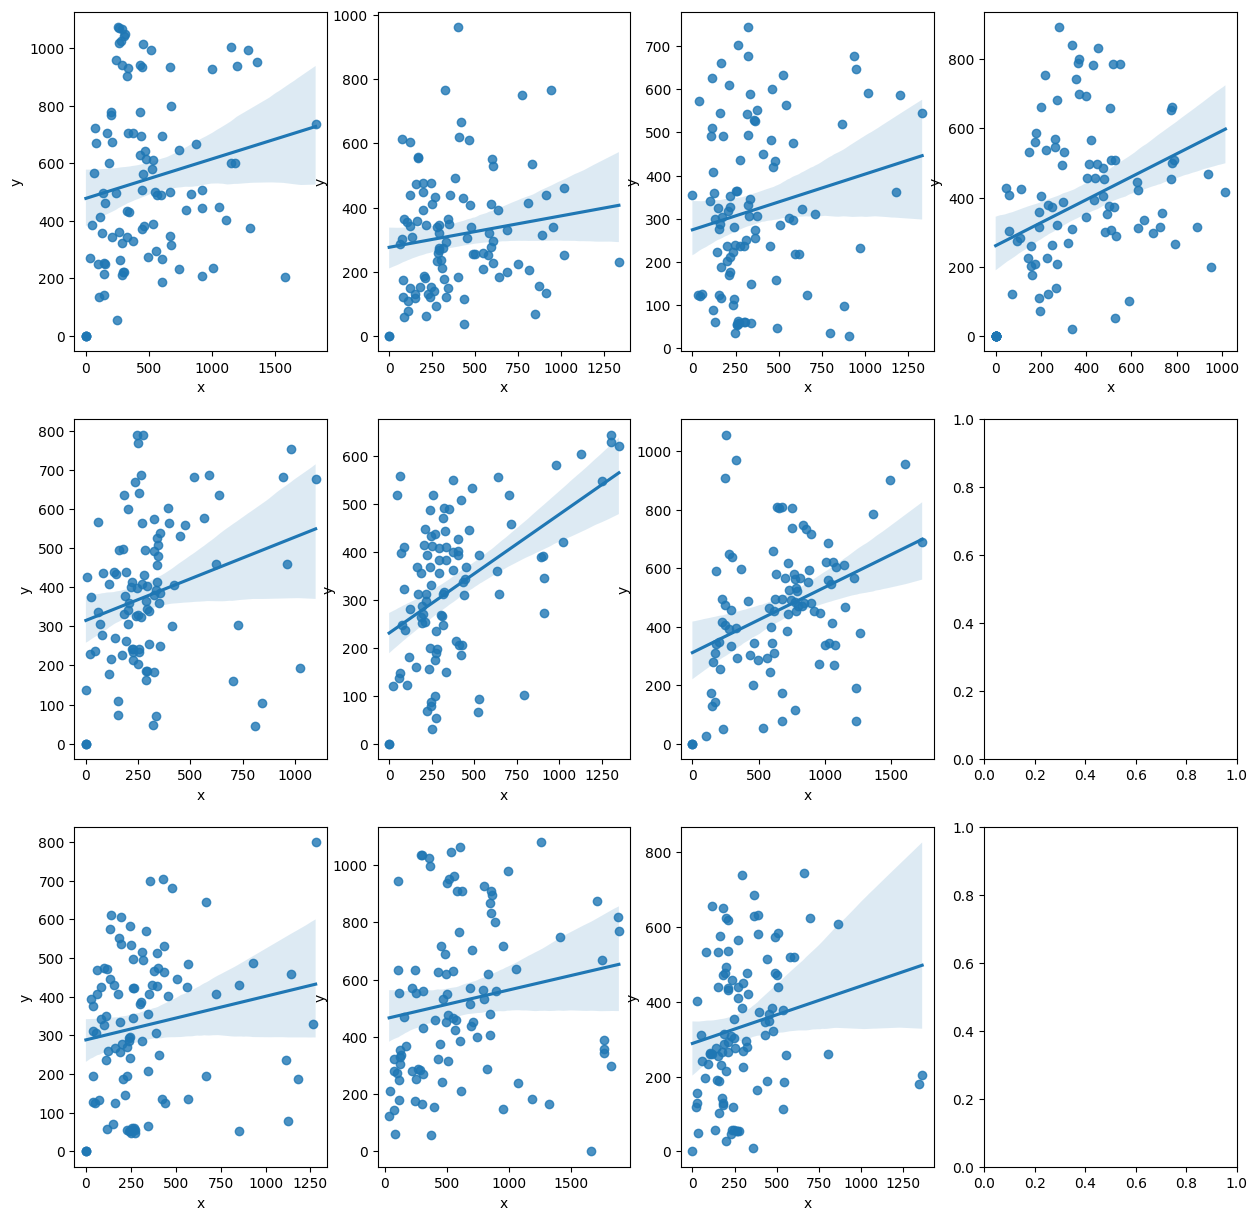

In [ ]:
i=0
j=0
fig,axes=plt.subplots(int(len(user_names)/3),4,figsize=(15,15))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==3):
        j=j+1
        i=0
    sns.regplot(x='x',y='y',data=udf,ax=axes[i,j])
    i=i+1

### Plot some sample movements

In [ ]:
sess_df

,record timestamp,client timestamp,button,state,x,y,user,session
1635108,0.000,0.000,NoButton,Move,488,651,user12,session_9838420452
1635109,0.104,0.109,NoButton,Move,639,559,user12,session_9838420452
1635110,0.311,0.202,NoButton,Move,757,392,user12,session_9838420452
1635111,0.312,0.312,NoButton,Move,840,129,user12,session_9838420452
1635112,0.700,0.702,NoButton,Move,902,92,user12,session_9838420452
...,...,...,...,...,...,...,...,...
1664825,16844.907,16845.066,NoButton,Move,1195,238,user12,session_9838420452
1664826,16845.105,16845.159,NoButton,Move,1219,239,user12,session_9838420452
1664827,16845.411,16845.300,NoButton,Move,1229,239,user12,session_9838420452
1664828,16845.411,16845.565,NoButton,Move,1231,240,user12,session_9838420452


In [ ]:
sessions=pd.Series.unique(final_df['session'])

In [ ]:
sessions[45]

'session_9838420452'

In [ ]:
i=0
j=0
fig,axes=plt.subplots(int(len(user_names)/3),4,figsize=(15,15))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==3):
        j=j+1
        i=0
    sns.regplot(x='x',y='y',data=udf,ax=axes[i,j])
    i=i+1

####Mouse Movement of a particular session here session_9838420452

Seconds captured 16845.892000


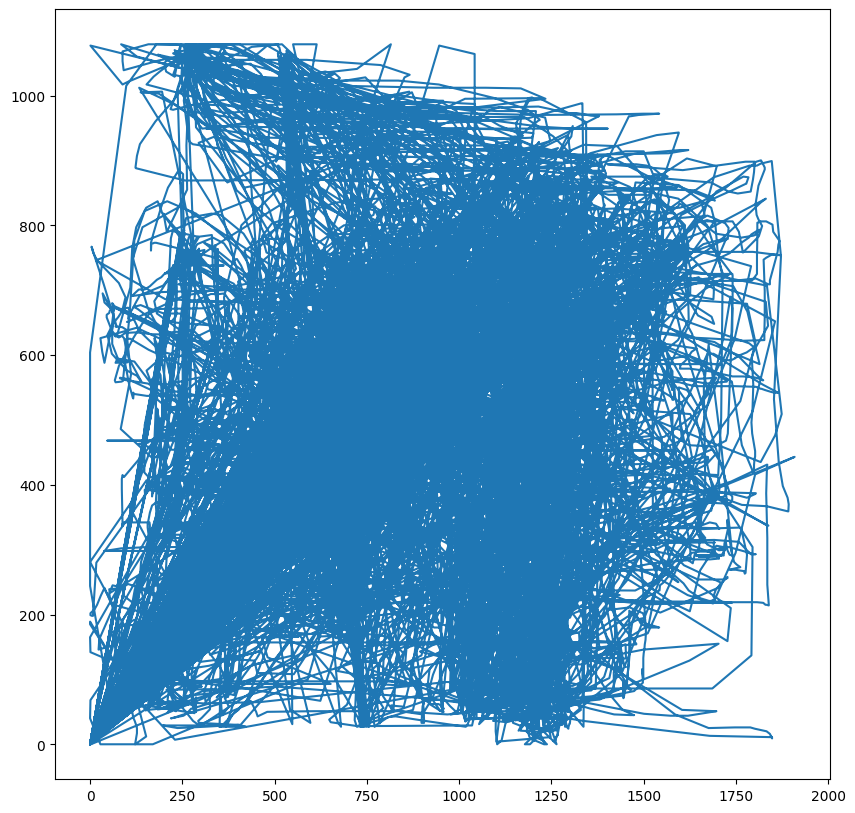

In [ ]:
sess_df=final_df[final_df['session']==sessions[45]]
plt.figure(figsize=(10,10))
plt.plot(sess_df['x'],sess_df['y'])
print('Seconds captured %f'%np.max(sess_df['record timestamp']))

### Distribution of states

<Axes: xlabel='state', ylabel='count'>

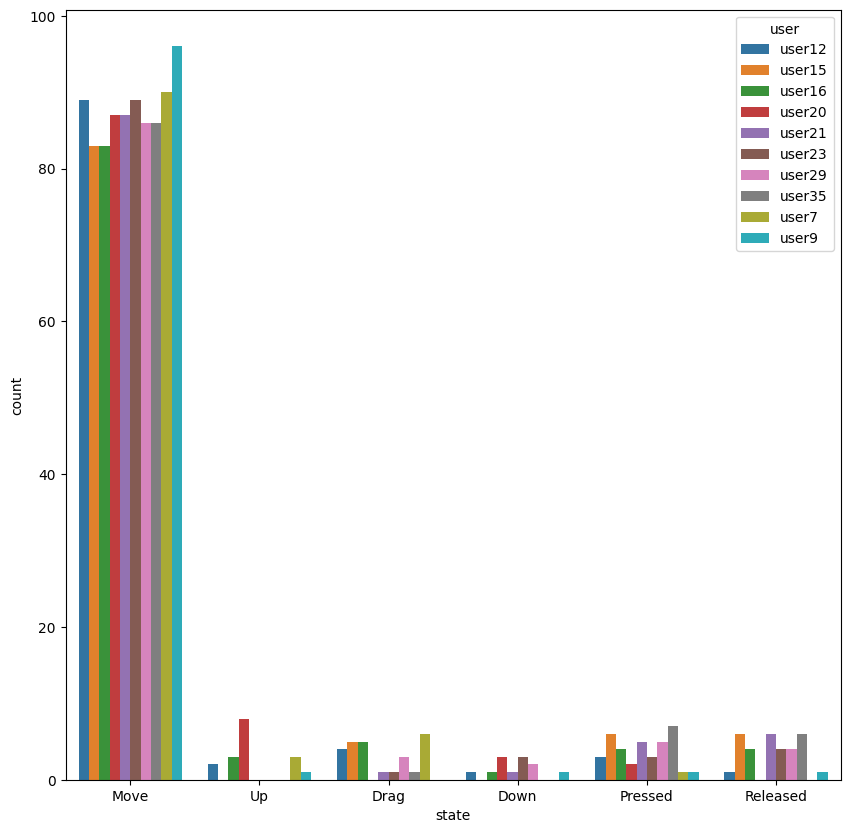

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='state',data=sample_df,hue='user')

##Trying to extract extra features from mouse vector

In [ ]:
final_df

,record timestamp,client timestamp,button,state,x,y,user,session
0,0.000,0.000,NoButton,Move,211,517,user16,session_6961018175
1,0.000,0.109,NoButton,Move,518,478,user16,session_6961018175
2,0.225,0.359,NoButton,Move,543,469,user16,session_6961018175
3,0.328,0.468,NoButton,Move,583,454,user16,session_6961018175
4,0.442,0.577,NoButton,Move,595,436,user16,session_6961018175
...,...,...,...,...,...,...,...,...
2253811,13294.976,13295.061,NoButton,Move,272,624,user20,session_9673196280
2253812,13295.259,13295.154,NoButton,Move,267,622,user20,session_9673196280
2253813,13295.259,13295.342,NoButton,Move,265,622,user20,session_9673196280
2253814,13295.411,13295.498,NoButton,Move,264,622,user20,session_9673196280


###Analysinmg for user 16 (here)

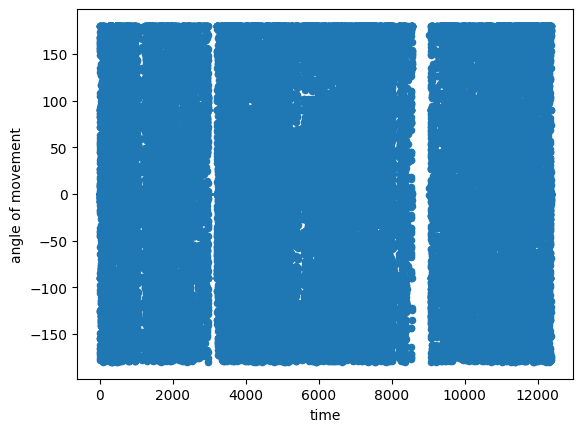

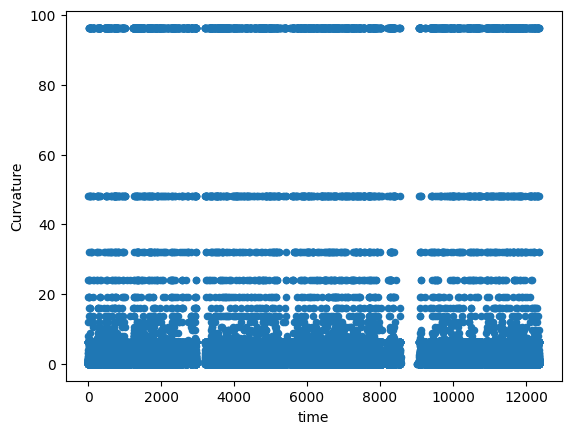

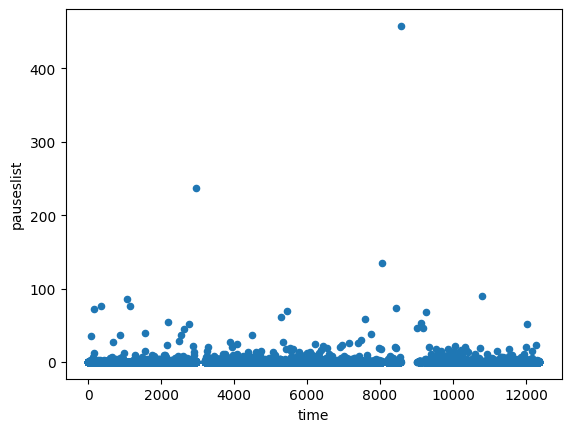

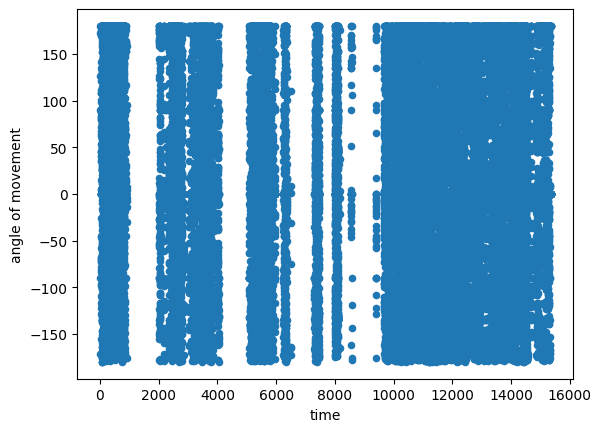

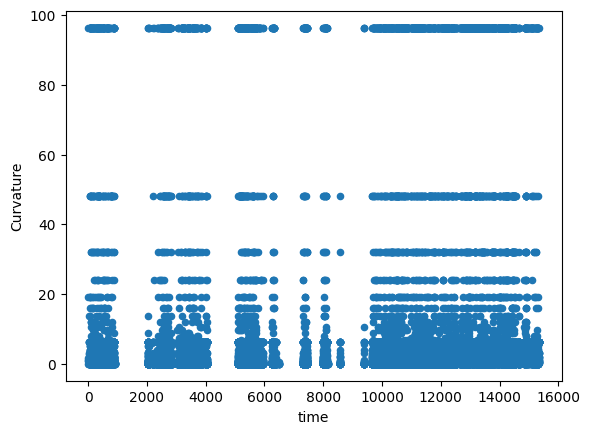

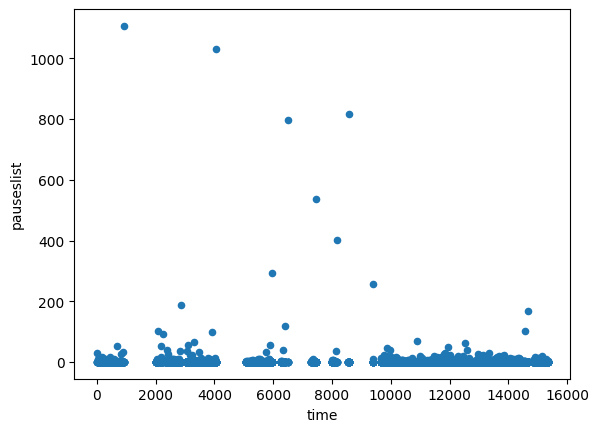

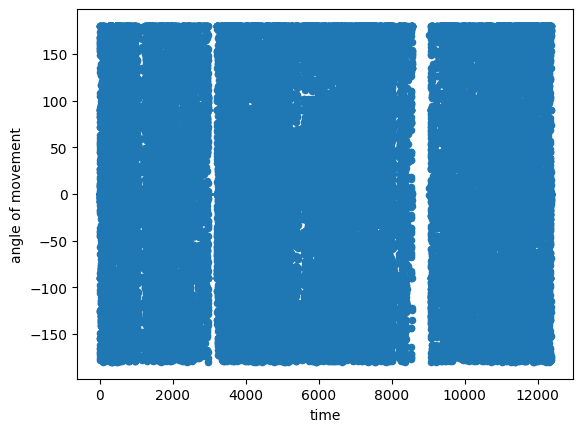

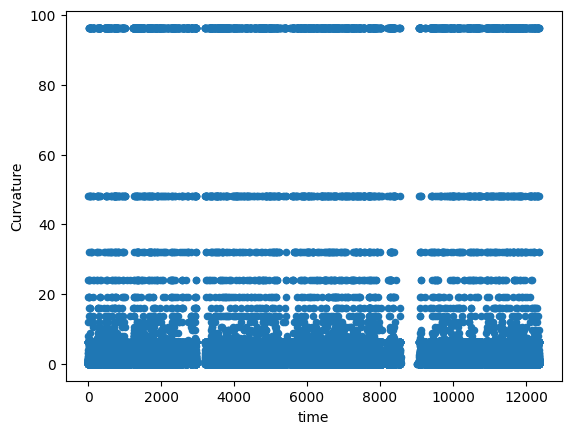

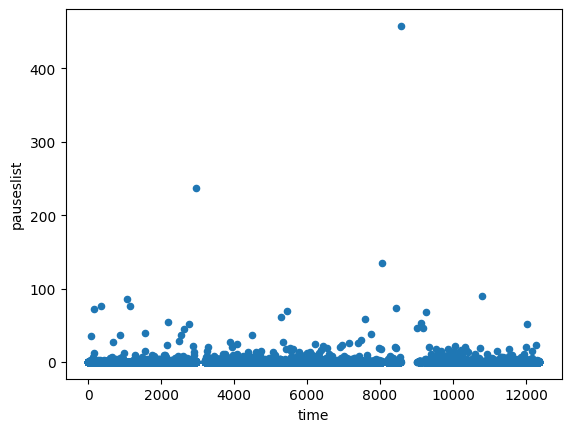

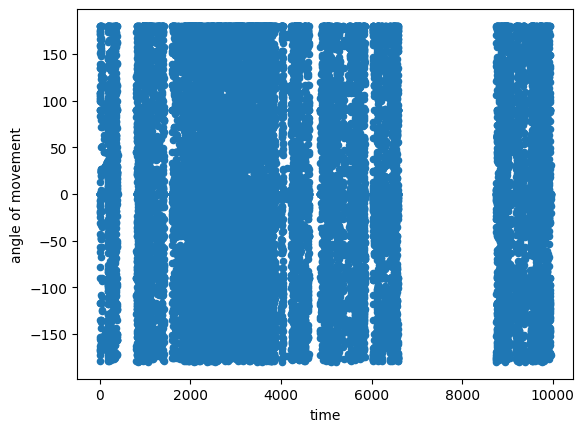

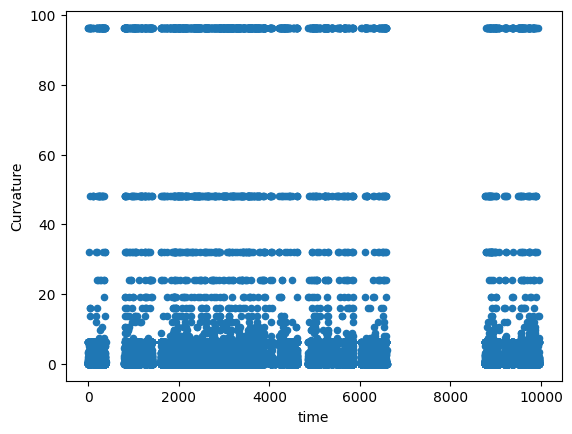

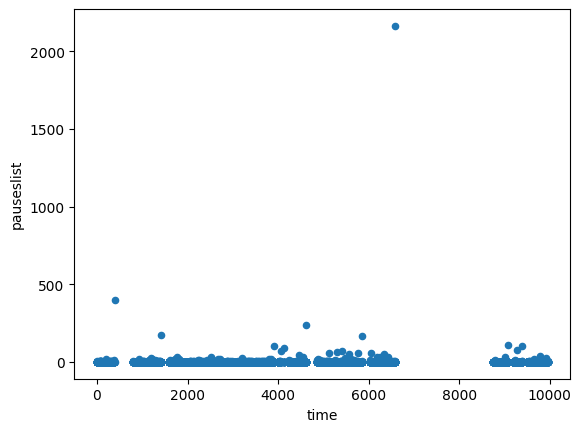

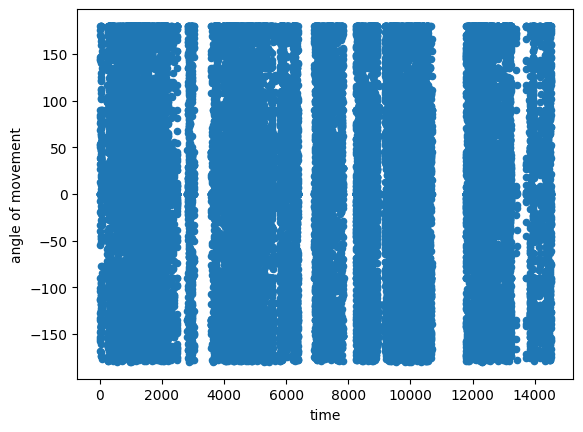

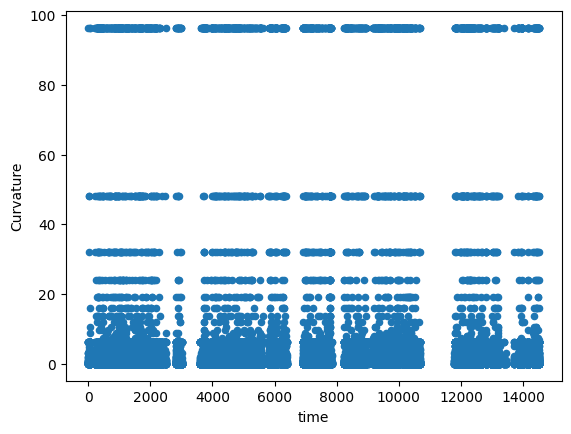

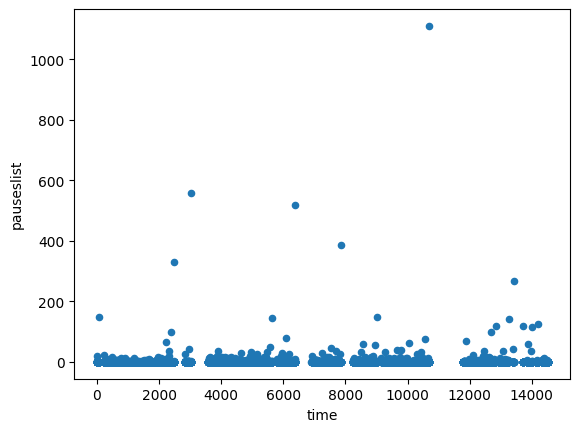

IndexError: ignored

In [ ]:

files = ['session_0735651357', 'session_1607878631', 'session_0735651357', 'session_6961018175', 'session_3012944488']
single = []
def time():
    timevec = np.array([])
    for i in range(len(df) - 1):
        time = df.iloc[i]['client timestamp']
        timevec = np.append(timevec, time)
    return timevec

def delta_theta(no_rows):
    summation_deltatheta = 0
    for i in range(no_rows + 1):
        deltax = df.iloc[i + 1]['x'] - df.iloc[i]['x']
        deltay = df.iloc[i + 1]['y'] - df.iloc[i]['y']
        if deltax == 0 and deltay == 0:
            delta_thetavalue = (0 + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
        elif deltax == 0:
            delta_thetavalue = (90 + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
        else:
            delta_thetavalue = (np.arctan(deltay / deltax) + 2 * np.pi)
            summation_deltatheta += delta_thetavalue
    return summation_deltatheta


def angle_of_movement():
    totalanglemovement = np.array([])
    for i in range(len(df) - 1):
        angle_movement = np.arctan2(df.iloc[i + 1]['y'] - df.iloc[i]['y'], df.iloc[i + 1]['x'] - df.iloc[i]['x'])
        totalanglemovement = np.append(totalanglemovement, angle_movement * 180 / np.pi)
    return totalanglemovement


def mean_angle_of_movement(var):
    mean_angle_of_movementvalue = np.mean(var)
    return mean_angle_of_movementvalue


# Curvature


def diff_theta(x1, x2, y1, y2):
    deltax = x2 - x1
    deltay = y2 - y1
    if deltay == 0 and deltax == 0:
        distance = 1
        theta = (0 + 2 * np.pi)
        diff_thetavalue = np.divide(theta, distance)
    elif deltax == 0:
        s = (y2 - y1) ** 2
        distance = np.sqrt(s)
        theta = (90 + 2 * np.pi)
        diff_thetavalue = np.divide(theta, distance)
    else:
        s = (x2 - x1) ** 2 + (y2 - y1) ** 2
        distance = np.sqrt(s)
        theta = np.arctan(deltay / deltax) + 2 * np.pi
        diff_thetavalue = np.divide(theta, distance)
    return diff_thetavalue


def curvature():
    curvaturevec = np.array([])
    for i in range(len(df) - 1):
        a = df.iloc[i + 1]['x']
        b = df.iloc[i]['x']
        c = df.iloc[i + 1]['y']
        d = df.iloc[i]['y']
        curvatureval = diff_theta(a, b, c, d)
        curvaturevec = np.append(curvaturevec, curvatureval)
    return curvaturevec


def mean_curvature(var):
    mean_curvatureval = np.mean(var)
    return mean_curvatureval


# This varies between 0 and 1 where 1 is
# equal to the shortest path between the initial point and final point
# It may be noted that generally humans have poor efficiency and bots have high efficiency and hence
# this may be very useful in differentiating between the two from mouse movements
def efficiency():
    max_x = df.iloc[len(df) - 1]['x']
    max_y = df.iloc[len(df) - 1]['y']
    init_x = df.iloc[0]['x']
    init_y = df.iloc[0]['y']
    sqrx = np.square(max_x - init_x)
    sqry = np.square(max_y - init_y)
    best_dist = np.sqrt(sqrx + sqry)
    sum_of_distances = 0
    for j in range(len(df) - 1):
        sum_of_distances += np.sqrt(np.square(df.iloc[j + 1]['x'] - df.iloc[j]['x'])
                                    + np.square(df.iloc[j + 1]['y'] - df.iloc[j]['y']))

    final_efficiency = np.divide(best_dist, sum_of_distances)
    return final_efficiency


def meandistance():
    tempx = 0
    tempy = 0
    for l in range(len(df)):
        tempx += df.iloc[l]['x']
        tempy += df.iloc[l]['y']
    mean_x = np.divide(tempx, len(df))
    mean_y = np.divide(tempy, len(df))
    meanboth = np.array([mean_x, mean_y])
    return meanboth


def distancefromcentre(meanxy, currentxy):
    return np.sqrt(np.square(currentxy[0] - meanxy[0]) + np.square(currentxy[1] - meanxy[1]))


# Regularity is higher for bots as they might mostly move straight to the target
def regularity():
    tempdistance = 0
    distanceofcentre = meandistance()
    for u in range(len(df)):
        current_point = np.array([df.iloc[u]['x'], df.iloc[u]['y']])
        tempdistance += distancefromcentre(distanceofcentre, current_point)
    meanofthedistances = np.divide(tempdistance, len(df))
    tempdeviation = 0
    for t in range(len(df)):
        current_point = np.array([df.iloc[u]['x'], df.iloc[u]['y']])
        tempdeviation += np.square(distancefromcentre(distanceofcentre, current_point) -
                                   meanofthedistances)
    std_deviation_square = np.divide(tempdeviation, len(df))
    std_deviation = np.sqrt(std_deviation_square)
    finalregularityofcompletepath = np.divide(meanofthedistances, (meanofthedistances + std_deviation))
    return finalregularityofcompletepath


# Denotes the total number of pauses in a session, A poorly designed bot that mimics the mouse wil be caught by this
# may be easily caught with the help of this metric
def pauseslist():
    pauses = np.array([])
    for h in range(len(df) - 1):
        timediff = df.iloc[h + 1]['client timestamp'] - df.iloc[h]['client timestamp']
        if timediff > 0.1:  # Here, we use the standard value accepted as 0.1 we cannot accept diff between any two interval as pause there has to be threshold
            pauses = np.append(pauses, timediff)
        else:
            pauses = np.append(pauses, 0)
    return pauses


def num_of_pauses(list_of_pauses):
    countpauses = 0
    for h in range(len(list_of_pauses)):
        if list_of_pauses[h] != 0:
            countpauses += 1
    return countpauses




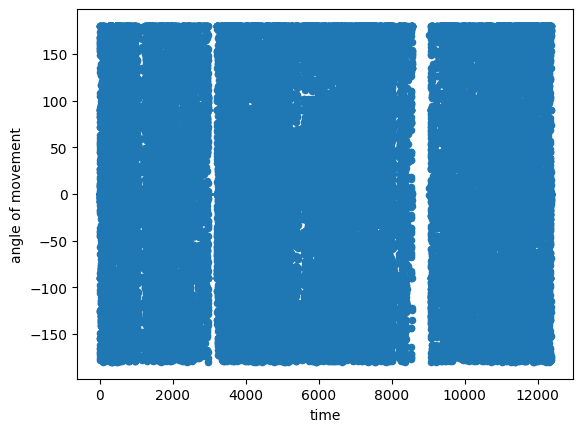

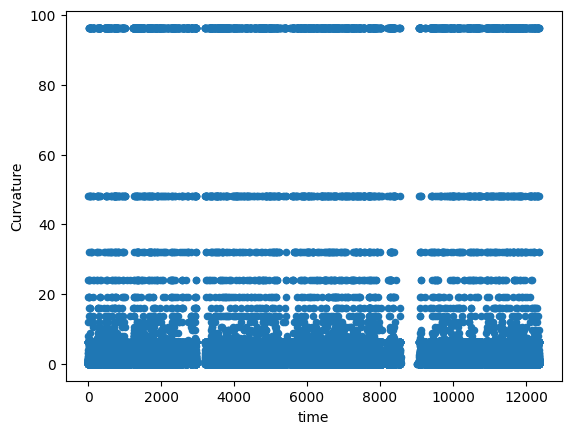

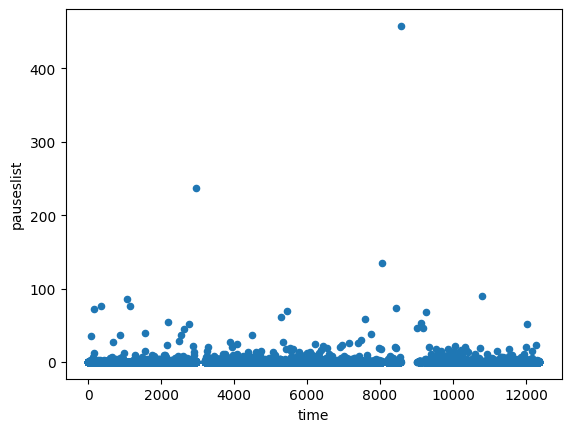

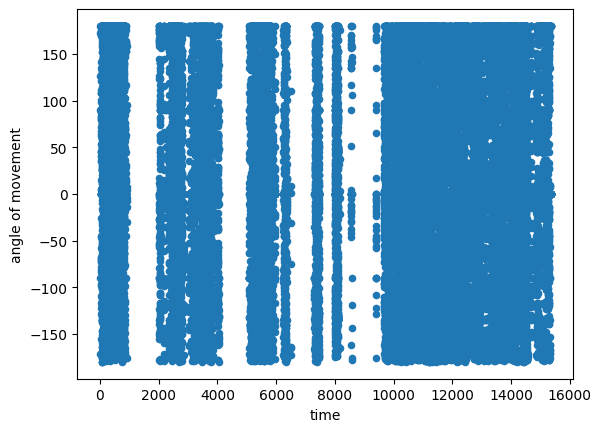

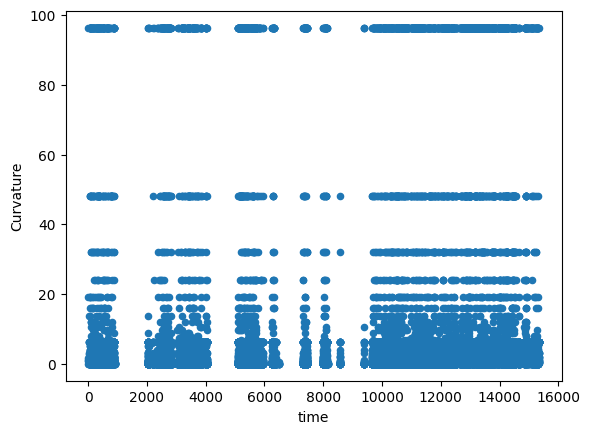

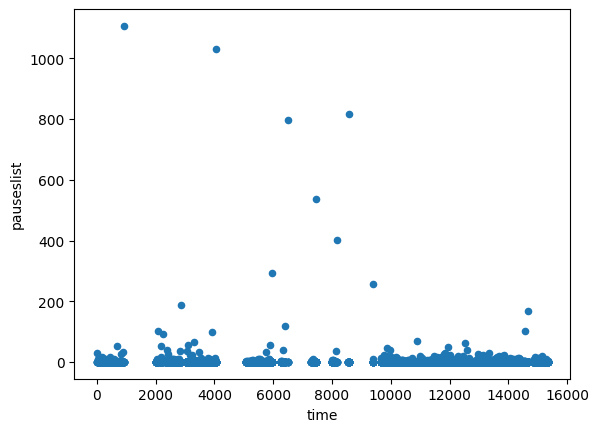

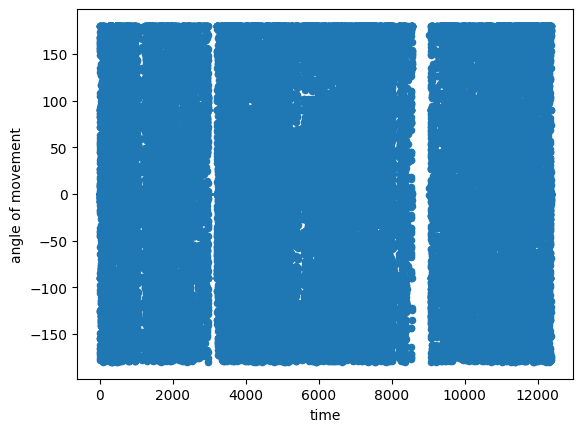

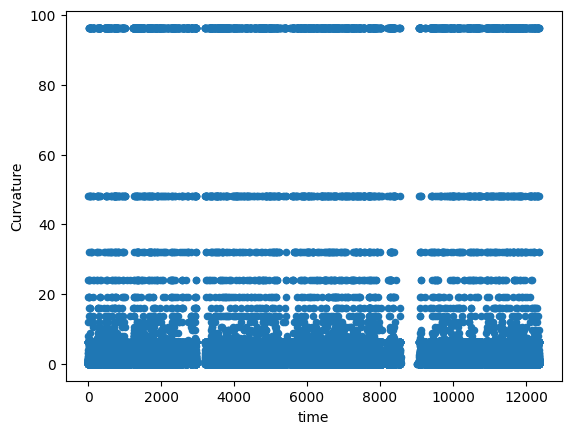

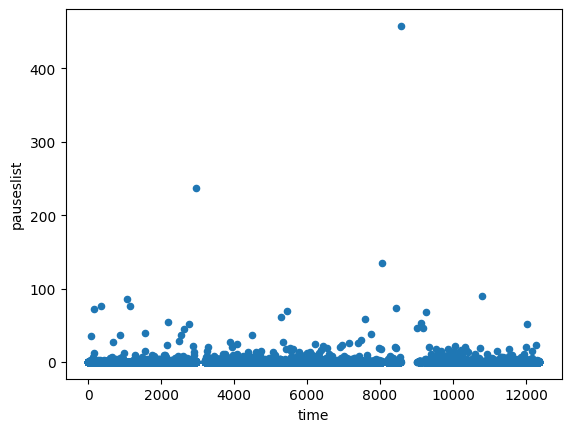

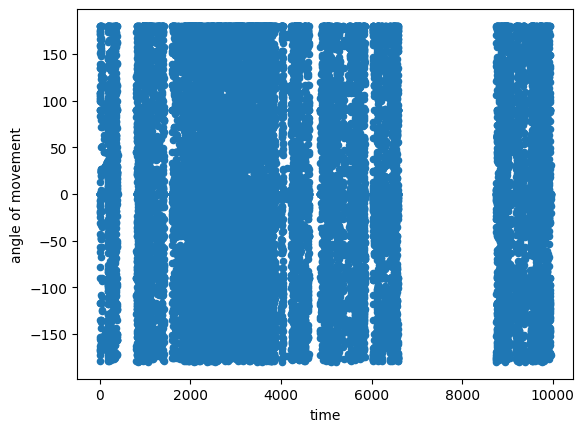

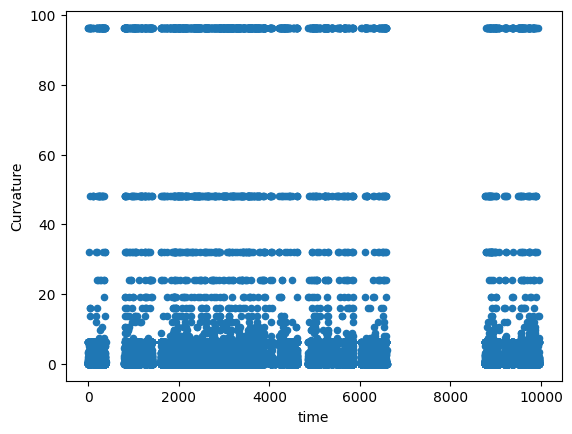

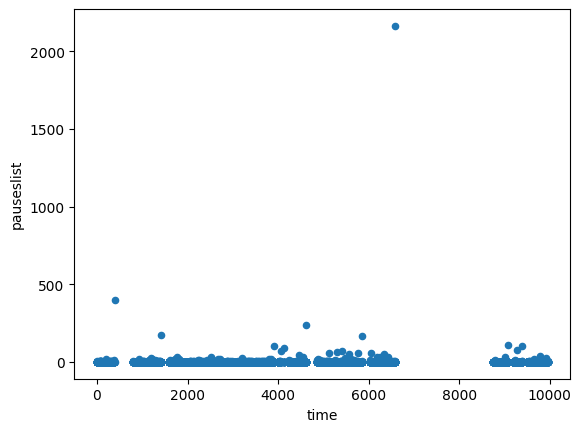

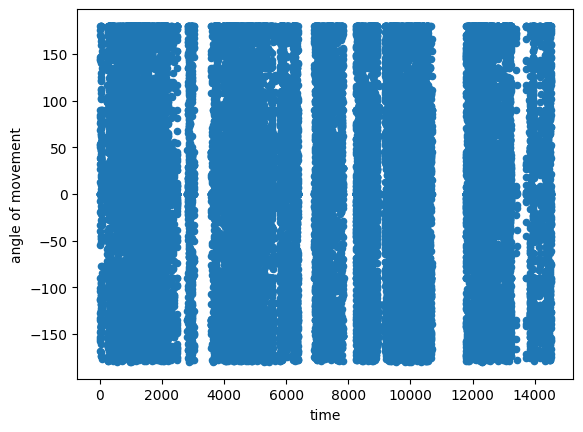

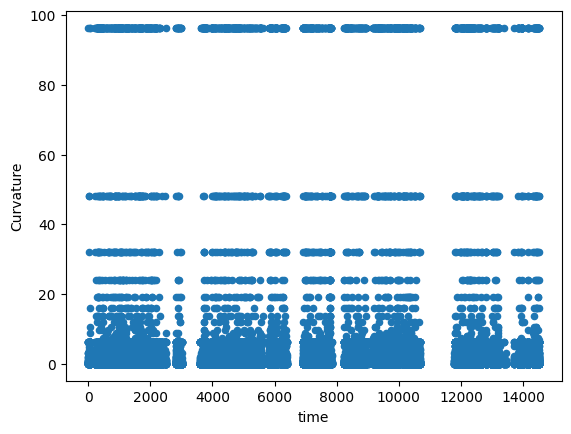

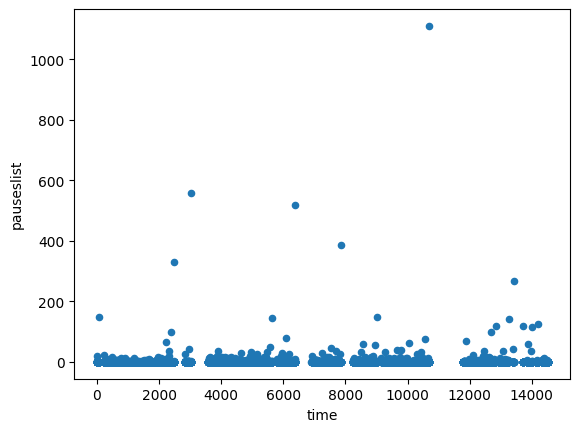

   mean angle of movement  mean_curvature  efficiency  regularity  \
0                0.377549        6.195896    0.000145    0.700119   
1                6.440770        7.541342    0.000353    0.777718   
2                0.377549        6.195896    0.000145    0.700119   
3                2.785669        6.080643    0.000821    0.296199   
4               -4.530565        5.353192    0.000097    0.944297   
5                0.377549        6.195896    0.000145    0.700119   
6                6.440770        7.541342    0.000353    0.777718   
7                0.377549        6.195896    0.000145    0.700119   
8                2.785669        6.080643    0.000821    0.296199   
9               -4.530565        5.353192    0.000097    0.944297   

   Total change in angle  Number of mouse pauses  
0             -37.970998                 39654.0  
1              13.279130                 28778.0  
2             -37.970998                 39654.0  
3             -67.453309            

In [ ]:
def total_change_in_angle():
    finalangle = np.arctan2(df.iloc[len(df) - 1]['y'], df.iloc[len(df) - 1]['x'])
    firstangle = np.arctan2(df.iloc[0]['y'], df.iloc[0]['x'])
    return (finalangle - firstangle) * 180 / np.pi

features2 = np.empty([3, 0])
for i in range(5):
    sessions = files[i]
    df = pd.read_csv(sessions)
    Featurevector = pd.DataFrame()
    list_of_pauses = pauseslist()
    allangles = angle_of_movement()
    var = curvature()
    features1 = np.array([mean_angle_of_movement(allangles), mean_curvature(var), efficiency(), regularity(),
                          total_change_in_angle(), num_of_pauses(list_of_pauses)])
    features2 = np.hstack((features2,np.array([allangles, var, list_of_pauses], dtype=object)))
    single.insert(i, features1)

    Featurevector['time'] = time()
    Featurevector['angle of movement'] = allangles
    Featurevector['Curvature'] = var
    Featurevector['pauseslist'] = list_of_pauses
    Featurevector['num_of_pauses'] = num_of_pauses(list_of_pauses)

    Featurevector.plot.scatter(x='time', y='angle of movement')
    Featurevector.plot.scatter(x='time', y='Curvature')
    Featurevector.plot.scatter(x='time', y='pauseslist')
    Featurevector.plot.scatter(x='time', y='regularity')
    Featurevector.plot.scatter(x='time', y='efficiency')
    plt.show()


smartyrad = pd.DataFrame(data=single, columns=['mean angle of movement', 'mean_curvature', 'efficiency', 'regularity',
                                               'Total change in angle', 'Number of mouse pauses'])
smarita = pd.DataFrame(data=features2, index=['angle of movement', 'curvature', 'pauseslist'])

print(smartyrad)
print(smarita)

##Plotting User on 2D space

###Feature to determine user's individuality

In [ ]:
features=[]
user_names=pd.Series.unique(final_df['user'])
for u in user_names:
    feature=[]
    df=final_df[final_df['user']==u]
    feature.append(df['x'].mean())
    feature.append(df['y'].mean())
    feature.append(df['x'].std())
    feature.append(df['y'].std())
    features.append(feature)
features=np.stack(features)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
%matplotlib inline

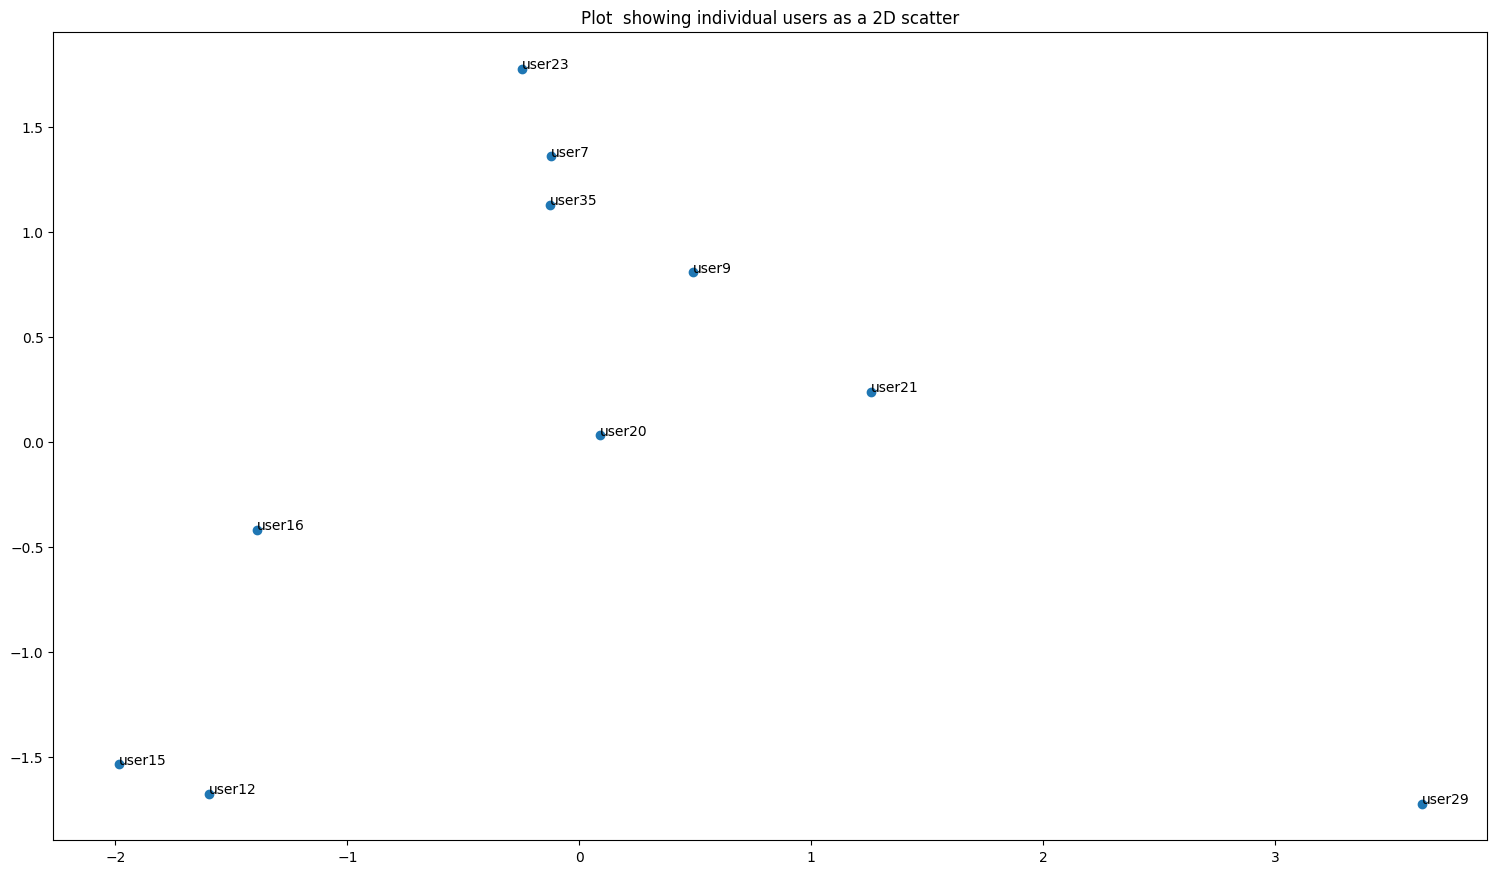

In [ ]:
scaler=StandardScaler()
features=scaler.fit_transform(features)
pca=PCA(n_components=2)
two_d=pca.fit_transform(features)
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
ax.scatter(two_d[:,0],two_d[:,1])
ax.set_title("Plot  showing individual users as a 2D scatter")

for i, txt in enumerate(user_names):
    ax.annotate(txt, (two_d[i,0],two_d[i,1]))

In [ ]:
##CLustering of Users:

###Identifying best possible K value using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

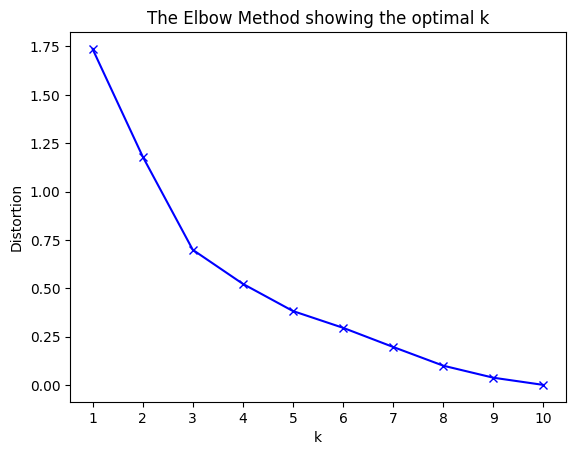

In [ ]:
k_val=range(1,10)
cluster_vals=range(1,11)
distortions=[]
for c in cluster_vals:
    kmeans=KMeans(n_clusters=c)
    cluster_index=kmeans.fit_predict(features)
    distortions.append(sum(np.min(cdist(features, kmeans.cluster_centers_, 'euclidean'), axis=1))/features.shape[0])
plt.xticks(cluster_vals)
plt.plot(cluster_vals,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


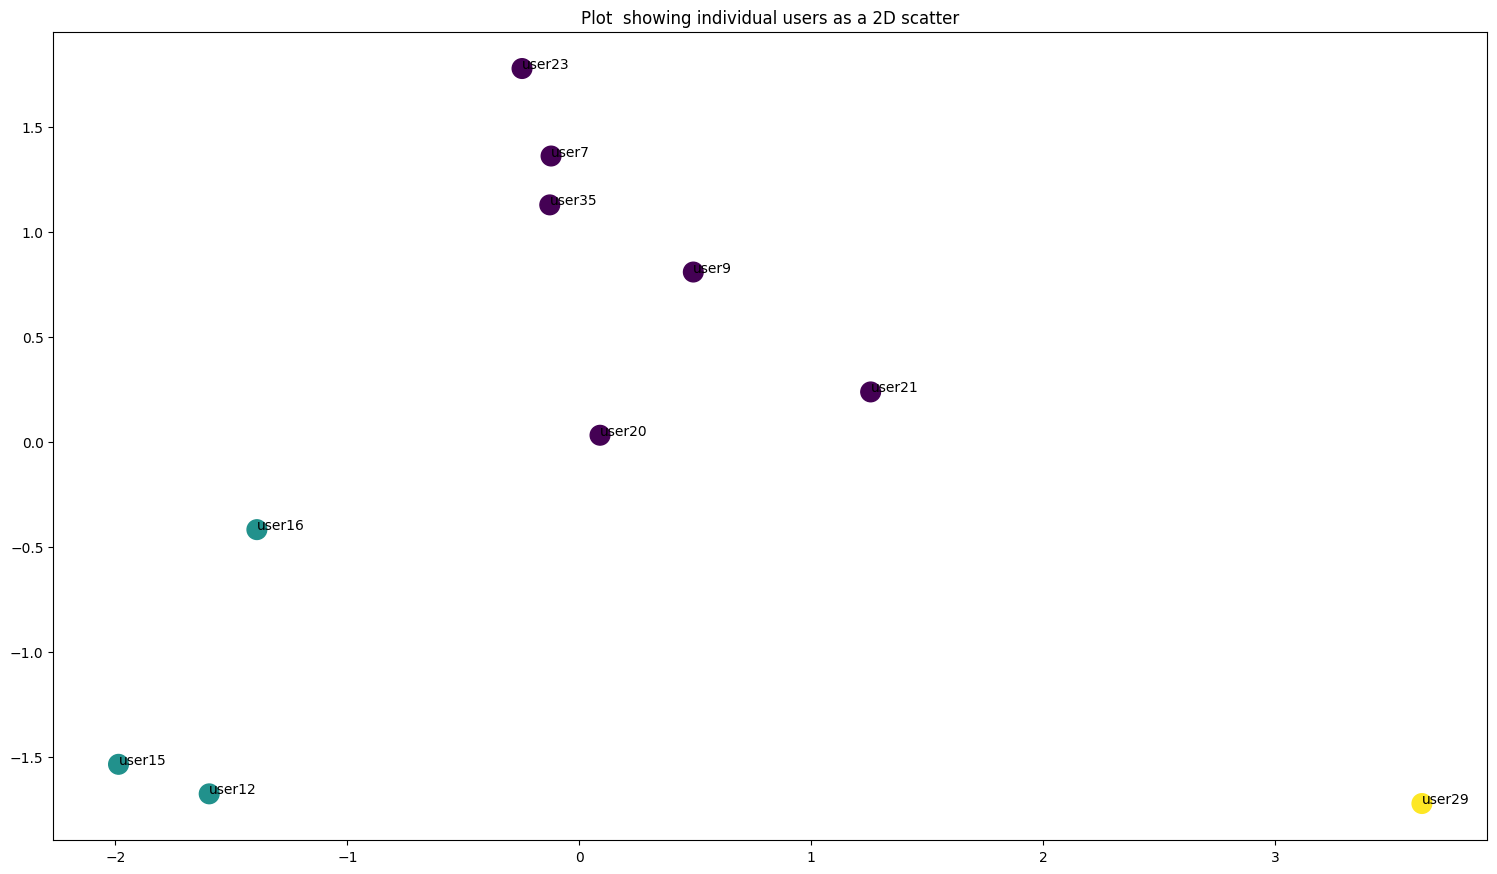

In [ ]:
kmeans=KMeans(n_clusters=3)
cluster_index=kmeans.fit_predict(features)
fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
ax.scatter(two_d[:,0],two_d[:,1],c=cluster_index,marker='o',s=200)
ax.set_title("Plot  showing individual users as a 2D scatter")
for i, txt in enumerate(user_names):
    ax.annotate(txt, (two_d[i,0],two_d[i,1]))